In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import yeojohnson

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/EUS_Bibliotecas_Publicas_2021.xlsx',skiprows=1)

In [ ]:
df2=df.iloc[:,[45,46,47,48,51,53,55,57,60,61,68,69]]
df2.to_excel('practica2.xlsx',index=False)

In [ ]:
df2.head()

,ADECUACIÓN COLECCIÓN,ESTADO MATERIAL,ORGANIZACIÓN,ORDENACIÓN,TRATO,INFORMACIÓN.1,HORARIO,WIFI.1,ESTADO,LIMPIEZA,<5 CAUSA,VALORACION GLOBAL
0,8,8,8,8,9,8,8,7,8,8,NaN,9
1,NaN,10,9,10,10,NaN,8,NaN,9,9,NaN,9
2,8,10,7,7,10,7,8,8,8,8,NaN,7
3,9,8,8,9,10,10,5,5,7,10,NaN,9
4,8,9,8,9,9,9,NaN,NaN,9,9,NaN,9


In [ ]:
for k in range(len(df2.columns)-2):
  idx=[]
  for i in range(len(df2)):
    idx.append(isinstance(df2.iloc[i,k],str))
  df2.iloc[idx,k]=np.nan
idx=[]
for i in range(len(df2)):
  idx.append(isinstance(df2.iloc[i,-1],str))
df2.iloc[idx,-1]=np.nan
df2=df2[~df2['VALORACION GLOBAL'].isna()]
df2.isna().mean()

<ipython-input-44-d3ecff4a318c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.iloc[idx,k]=np.nan
<ipython-input-44-d3ecff4a318c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.iloc[idx,-1]=np.nan


ADECUACIÓN COLECCIÓN    0.120548
ESTADO MATERIAL         0.084018
ORGANIZACIÓN            0.091324
ORDENACIÓN              0.090411
TRATO                   0.025571
INFORMACIÓN.1           0.170776
HORARIO                 0.067580
WIFI.1                  0.566210
ESTADO                  0.028311
LIMPIEZA                0.017352
<5 CAUSA                0.814612
VALORACION GLOBAL       0.000000
dtype: float64

In [ ]:
df2_pt=df2.copy()
for k in range(len(df2.columns[:-2])):
  not_nan=~df2.iloc[:,k].isna()
  x=(df2[not_nan].iloc[:,k]).astype('float')
  df2_pt.iloc[not_nan,k],l=yeojohnson(x)
df2.skew(),df2_pt.skew()

<ipython-input-38-d61ed03ed45b>:6: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.skew(),df2_pt.skew()
<ipython-input-38-d61ed03ed45b>:6: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.skew(),df2_pt.skew()


(ADECUACIÓN COLECCIÓN   -1.085400
 ESTADO MATERIAL        -0.990969
 ORGANIZACIÓN           -1.449638
 ORDENACIÓN             -1.798218
 TRATO                  -2.829384
 INFORMACIÓN.1          -1.633246
 HORARIO                -1.345684
 WIFI.1                 -0.958462
 ESTADO                 -1.362436
 LIMPIEZA               -2.188901
 VALORACION GLOBAL      -1.531667
 dtype: float64,
 ADECUACIÓN COLECCIÓN   -0.152295
 ESTADO MATERIAL        -0.176348
 ORGANIZACIÓN           -0.372732
 ORDENACIÓN             -0.369890
 TRATO                  -0.786013
 INFORMACIÓN.1          -0.367446
 HORARIO                -0.480275
 WIFI.1                 -0.374430
 ESTADO                  0.271108
 LIMPIEZA               -0.562046
 VALORACION GLOBAL      -1.531667
 dtype: float64)

In [ ]:
x=(df2.iloc[:,-1]).astype('float')
df2_pt.iloc[:,-1],l=yeojohnson(x)

<ipython-input-29-0abf7ba41ef4>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2_pt.iloc[:,-1],l=yeojohnson(x)


In [ ]:
df2_pt['VALORACION GLOBAL'].skew()

-1.5316666692200012

In [ ]:
df2_pt.kurt()

<ipython-input-40-53cca3bae441>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2_pt.kurt()


ADECUACIÓN COLECCIÓN   -0.577374
ESTADO MATERIAL        -0.763467
ORGANIZACIÓN           -0.906714
ORDENACIÓN             -0.854666
TRATO                  -0.926555
INFORMACIÓN.1          -0.982182
HORARIO                -0.912642
WIFI.1                 -0.837696
ESTADO                  8.375781
LIMPIEZA               -0.876790
VALORACION GLOBAL       4.478992
dtype: float64

ValueError: ignored

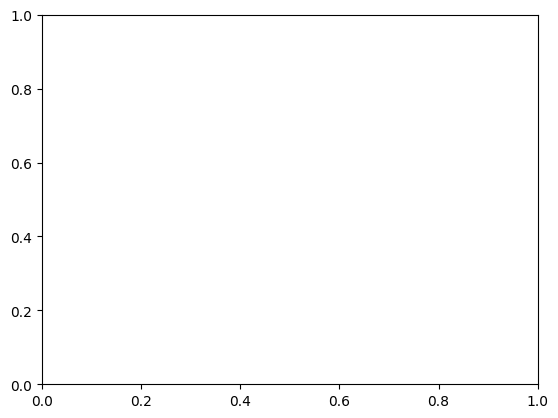

In [ ]:
df2_pt.drop(columns=['TRATO','LIMPIEZA','INFORMACIÓN.1','ORDENACIÓN']).boxplot()

In [ ]:
for k in range(len(df2.columns)-2):
  idx=[]
  for i in range(len(df2)):
    idx.append(isinstance(df2.iloc[i,k],str))
  df2_bc.iloc[idx,k]=df2.iloc[idx,k]
idx=[]
for i in range(len(df2)):
  idx.append(isinstance(df2.iloc[i,-1],str))
df2_bc.iloc[idx,-1]=df2.iloc[idx,-1]

In [ ]:
df2_bc

,ADECUACIÓN COLECCIÓN,ESTADO MATERIAL,ORGANIZACIÓN,ORDENACIÓN,TRATO,INFORMACIÓN.1,HORARIO,WIFI.1,ESTADO,LIMPIEZA,<5 CAUSA,VALORACION GLOBAL
0,59.716534,82.938444,214.911335,425.080164,714257.102891,496.012725,91.99729,21.938675,45.065916,2261.688594,NaN,9.0
1,NaN,134.890517,292.908757,824.205739,1349886.163036,NaN,91.99729,NaN,56.159925,3507.612227,NaN,9.0
2,59.716534,134.890517,152.002777,288.155234,1349886.163036,333.052104,91.99729,27.163449,45.065916,2261.688594,NaN,7.0
3,75.647987,82.938444,214.911335,601.81997,1349886.163036,977.500864,33.512551,12.949268,35.215375,5216.821374,NaN,9.0
4,59.716534,107.079945,214.911335,601.81997,714257.102891,708.261369,NaN,NaN,56.159925,3507.612227,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1107,93.665303,107.079945,387.557039,824.205739,353395.837932,977.500864,68.657897,NaN,68.506477,5216.821374,NaN,8.0
1108,NaN,NaN,NaN,NaN,NaN,NaN,68.657897,NaN,56.159925,3507.612227,Calefacción alta y refrigeración pobre en varano,7.0
1109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1110,33.907035,30.904854,214.911335,425.080164,65968.311548,333.052104,49.242978,6.021801,No uso,0.0,La BPM Vicálvaro necesita una reforma de calad...,5.0


In [ ]:
df1=df.iloc[:,68:69]
df1.columns=['CAUSA']
df1['CAUSA']=df1['CAUSA'].fillna('Vacio')
idx=[]
for i in range(len(df1)):
  idx.append(not isinstance(df1.iloc[i,0],str))
df1.iloc[idx,0]=np.nan
df1.dropna(inplace=True)

In [ ]:
cv=TfidfVectorizer(ngram_range=(1,2))
data=cv.fit_transform(df1['CAUSA'])
data

<1107x3486 sparse matrix of type '<class 'numpy.float64'>'
	with 7057 stored elements in Compressed Sparse Row format>

In [ ]:
suma=data.sum(axis=0)
suma.sort()

In [ ]:
np.array(suma)[0][-2:-12:-1]

array([14.01488094, 12.78410588, 12.74252217, 11.30004167, 10.77172746,
       10.29933772,  7.74885051,  7.68333926,  7.06664058,  6.98705621])

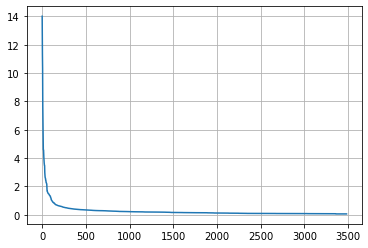

In [ ]:
plt.plot(np.array(suma)[0][-2:0:-1])
plt.grid()

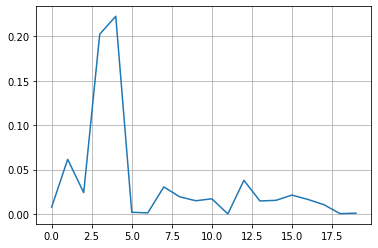

In [ ]:
dif=np.array(suma)[0][-2:0:-1]
plt.plot(dif[50:70]-dif[51:71])
plt.grid() # 54 palabras 

In [ ]:
m=54
n=data.toarray().shape[1]
FH=np.random.uniform(-1,1,(m,n))
FH_n=np.sqrt(np.sum(FH**2,axis=0))
FH=FH/FH_n
np.sqrt(np.sum(FH**2,axis=0))

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
data_m=(FH@data.T).T

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km=KMeans(n_clusters=10,n_init=50)
km.fit(data_m)

KMeans(n_clusters=10, n_init=50)

In [ ]:
ctr=km.predict(data_m)
ctr

array([0, 0, 0, ..., 0, 8, 0], dtype=int32)

In [ ]:
df1['ctr']=ctr
df1[df1.CAUSA!='Vacio'].head(20)

,CAUSA,ctr
5,Hace mucho calor en la sala de lectura y entra...,2
7,Unos días hace mucho frio y no se puede estar ...,2
8,Cuando ponen la calefación hace mucho calor y ...,9
10,"Hace demasiado calor en invierno y verano, imp...",1
16,Temperatura en la sala de estudio excesivament...,5
17,Mucho calor,9
18,Espacio de préstamo infantil muy caluroso,6
22,Hace demasiado calor en la sala de lectura. Ya...,6
23,no se pueden cargar los ordenadores porque no ...,4
24,Falta de enchufes en sala de lectura. Mala ref...,4


In [ ]:
causa=['Hace demasiado calor',
      'Poco tiempo de servicio.',
      'Falta de personal capacitado.',
      'Excelente servicio',
      'Falta de enchufes',
      'No hay internet',
      'Poco espacio para buscar libros',
      'El internet falla mucho',
      'Falta iluminacion',
      'Falta literatura',
      'Luz pesima',
      'Mucho frio',
      'Mucho calor en invierno',
      'Calefaccion espantosa',
      'Mucho frio en verano',
      'Falta de contactos',
      'La luz es deficiente',
      'Personal maleducado',
      'La climatizacion es espantosa',
      'Trato desagradable de los empleados',
      'Falta de mantenimiento',
      'Falta de limpieza']
prueba=cv.transform(causa)
prueba

<22x3486 sparse matrix of type '<class 'numpy.float64'>'
	with 97 stored elements in Compressed Sparse Row format>

In [ ]:
prueba_m=(FH@prueba.T).T
data_predict=km.predict(prueba_m)

In [ ]:
prb=pd.DataFrame(columns=['resena','grupo'])
prb['resena']=causa
prb['grupo']=data_predict

In [ ]:
prb

,resena,grupo
0,Hace demasiado calor,3
1,Poco tiempo de servicio.,7
2,Falta de personal capacitado.,4
3,Excelente servicio,8
4,Falta de enchufes,4
5,No hay internet,4
6,Poco espacio para buscar libros,6
7,El internet falla mucho,2
8,Falta iluminacion,4
9,Falta literatura,4


In [ ]:
df1[df1.ctr==1]

,CAUSA,ctr
10,"Hace demasiado calor en invierno y verano, imp...",1
62,Algunas de los funcionarios que atienden al pú...,1
65,Frio en invierno y mucho calor en verano,1
68,Haria falta aire acondicionado cuando hace calor,1
365,Siempre hay problemas con la temperatura del e...,1
372,No han funcionado por averías y son muy ruidosos.,1
385,En invierno hace frio y en verano calor,1
437,pasamos mucho frio en invierno y calor en verano,1
462,No he sentido ni frío en invierno ni calor en ...,1
578,Mucho calor en invierno por exceso de calefacción,1


In [ ]:
df1[df1.ctr==2]

,CAUSA,ctr
5,Hace mucho calor en la sala de lectura y entra...,2
7,Unos días hace mucho frio y no se puede estar ...,2
26,Horrible refrigeración del espacio. Muchísimos...,2
34,He respondido que no uso o es de 9 o 10 yo ten...,2
61,Hace tiempo que no funciona el préstamo interc...,2
66,Ha tenido que venir la COVID para estar una ve...,2
169,La calefacción se ha estropeado varias veces. ...,2
170,Las luces de las mesas son muy molestas porque...,2
306,"Luz fría es mala para la salud visual, debería...",2
312,El catálogo electrónico es poco intuitivo en a...,2


In [ ]:
df1[df1.ctr==3]

,CAUSA,ctr
94,el sistema ebiblio ha cambiado y el actual es ...,3
96,La refrigeración siempre defectuosa. El acceso...,3
239,La calefacción y el aire acondicionado del CC ...,3
339,El sistema no funciona,3
345,No funciona el aire,3
354,No funciona.,3
359,Ebiblio no va bien.,3
360,La climatización no suel funcionar correctamente.,3
366,En invierno hay que abrir las ventanas.,3
370,A menudo no funciona o no funciona correctamente.,3


In [ ]:
df1.to_csv('resenna.csv',index=False)